> About this app. This app helps you see state-level patterns driving CDC's national predicted overdose data.

## How to use this app

This app works best in Chrome or Firefox. You may need to refresh or hit ▶️ Run in the top right corner to wake up the app (~10 seconds). Select a state to see results. Use the download icon in the top right for a printable PDF. 

[App last updated January 15, 2025]

In [1]:
import pickle as pickle

# Unpickle latest_date.pkl
with open('latest_date.pkl', 'rb') as file:
    latest_date = pickle.load(file)

# Format the date as August 2024 format
formatted_date = latest_date.strftime('%B %Y')

# Print latest_date with text "Predicted overdoses through:"
print(f'Displaying CDC data sources WONDER and NCHS/NVSS Provisional mortality data.')
print(f'Predicted overdoses through: {formatted_date}')
print(f'Confirmed overdose counts through: December 2023')

Displaying CDC data sources WONDER and NCHS/NVSS Provisional mortality data.
Predicted overdoses through: August 2024
Confirmed overdose counts through: December 2023


Check out our post using this app and overdose data in general for background. And, sign up for our newsletter for updates.

<hr>

In [2]:
import pandas as pd

# Load the pickle file as a pandas DataFrame
with open('merged_df.pkl', 'rb') as file:
    merged_df = pd.read_pickle(file)

In [3]:
selected_state = 'Arkansas'

In [4]:
import plotly.graph_objects as go

# Filter merged_df for the selected state's data
graph_data = merged_df[merged_df['State Name'] == selected_state]

# Add hover text with year and month
graph_data = graph_data.copy()  # Prevent SettingWithCopyWarning
graph_data['HoverText'] = graph_data['Date'].dt.strftime('%Y-%B')

# Create the figure
fig = go.Figure()

# Add WONDER Deaths trace
fig.add_trace(go.Scatter(
    x=graph_data['Date'],
    y=graph_data['Deaths'],
    mode='lines',
    name='WONDER Monthly OD Deaths',
    line=dict(color='orange'),
    hovertext=graph_data['HoverText'],
    hoverinfo='text+y',
    yaxis='y1',
    connectgaps=True  # Force display of line even if there is no data
))

# Add Predicted Value trace
fig.add_trace(go.Scatter(
    x=graph_data['Date'],
    y=graph_data['Predicted Value'],
    mode='lines',
    name='12-month Predicted Value',
    line=dict(color='blueviolet'),
    hovertext=graph_data['HoverText'],
    hoverinfo='text+y',
    yaxis='y2',
    connectgaps=True  # Force display of line even if there is no data
))

# Add recreated12m trace
fig.add_trace(go.Scatter(
    x=graph_data['Date'],
    y=graph_data['recreated12m'],
    mode='lines',
    name='Recreated 12-month Cumulative',
    line=dict(color='cornflowerblue'),
    hovertext=graph_data['HoverText'],
    hoverinfo='text+y',
    yaxis='y2',
    connectgaps=True  # Force display of line even if there is no data
))

# Update layout with two y-axes
fig.update_layout(
    title=f'WONDER OD Deaths vs 12-month Predicted Value for {selected_state}',
    yaxis=dict(
        title='WONDER Monthly OD Deaths',
        titlefont=dict(color='orange'),
        tickfont=dict(color='orange'),
        side='left'
    ),
    yaxis2=dict(
        title='12-month Predicted (violet) and Recreated (blue)',
        titlefont=dict(color='cornflowerblue'),
        tickfont=dict(color='blueviolet'),
        overlaying='y',
        side='right'
    ),
    legend=dict(
        x=0.5, y=1.1, visible=True, orientation="h", xanchor="center"  # Place the legend above the chart
    ),
    template='plotly_white',
    hovermode='x',
    xaxis=dict(
        title='Date',
        range=['2018-01-01', '2024-12-31']  # Include complete range for 2018 through 2024
    )
)

fig.show()

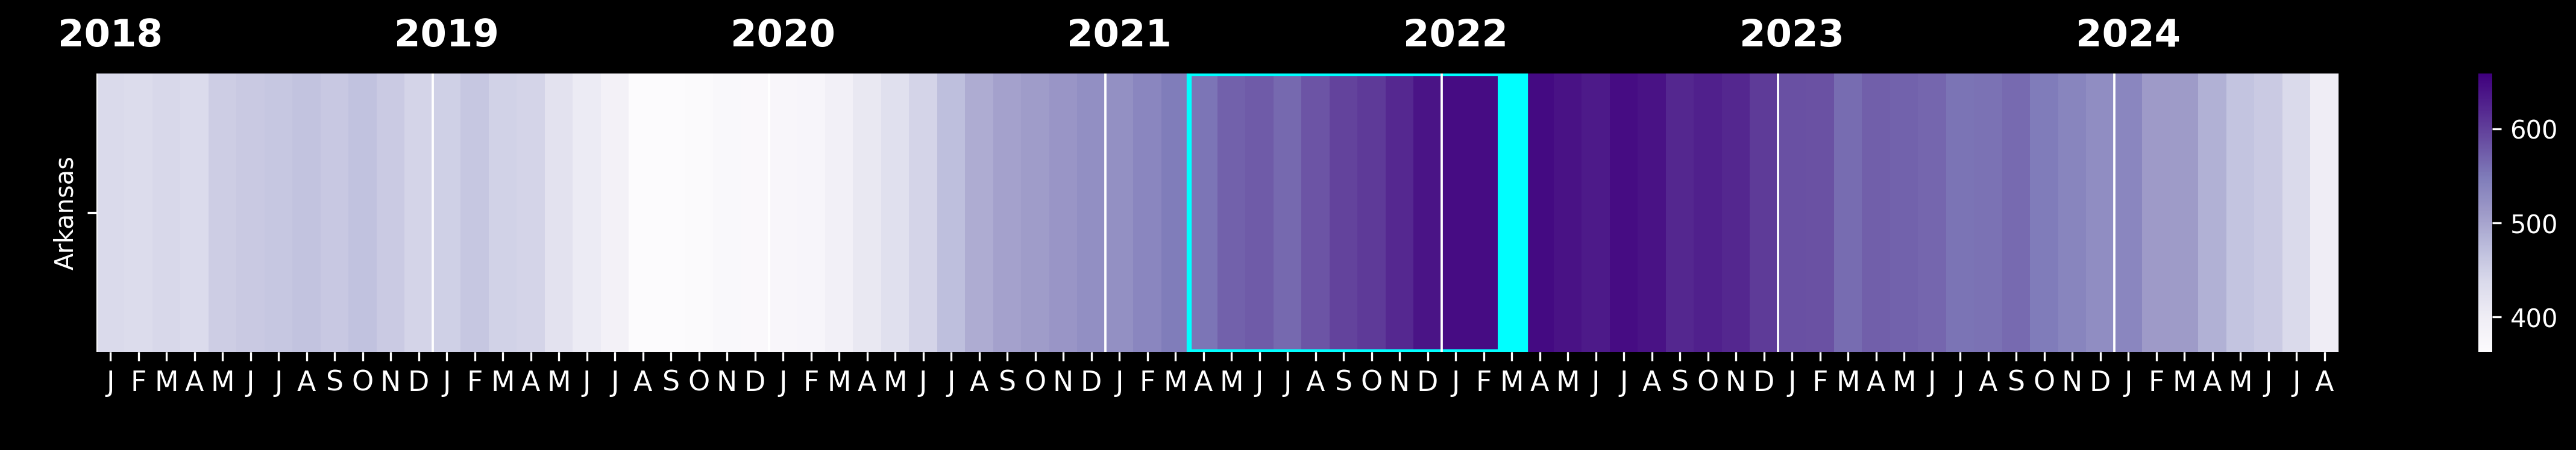

In [5]:
import IPython.display as display
from IPython.display import Image

# Display the .png /work/heatmaps from State Name
display.Image("heatmaps/" + selected_state + ".png")

<hr>

## What the lines mean

The 💜 prediction line is the official predicted overdose trend from CDC NVSS provisional overdose data -- you know, the data that media and policymakers use to understand what's happening with overdose trends nationally. The orange 🍊 line is the state's monthly count of final certified overdose deaths, aka the messy "truth." But it takes years for those data to post in WONDER, and are currently only reliably available through 2022 (final) or 2023 (provisional). The blue 💙 line is a yearly line we calculated ourselves by summing the monthly 🍊 "truth" data, a recreation of the official yearly violet 💜 prediction line. 

## About the heatmap

The heatmap below the lines shows 💜 prediction line in shades of purple, the 12-month predicted overdose count. The aqua box is the 12 month window corresponding to the highest overdose month (aqua bar). By comparing the peak month (aqua) to the orange line, you can see get a sense the OD pattern contributing to the predicted peak. Sometimes, the orange peak may not align with the aqua peak month, which we explain here.

## Notes and caveat

January 2023 onwards are provisional and/or partial data from WONDER.

Recreated data using monthly finalized WONDER counts from 2018 to 2022, and unadjusted provisional in 2023.

Orange and blue line data are for all New York state. Purple line data are for New York state minus New York City. Not our fault -- this is just how CDC reports things. Sorry to our friends in NYC! Y'all are exceptional.

<hr>

## Suggested Explorations

- Arizona: When do overdoses spike each year? How does the 12-month NVSS cumulative line respond? 

- Montana: Can you identify data drops? The cumulative WONDER count line does not adjust for these, but NVSS does.

- West Virginia: Two large spikes during COVID restriction era drive much of the early trend.

- Colorado: Peak OD may have been in 2021 (or early 2022), but the second peak in 2023 may be a sustained part of the earlier peak.

- Massachusetts: A massive drop starting in 2023 is predicted to continue into 2024.

- Nevada: Are two high OD months in 2023 driving the direction of the predicted trend for 2024?

<hr>

# Data and Code

This app was built by Nabarun Dasgupta at the University of North Carolina at Chapel Hill in January 2025. This app is not scheduled for regular updates, but can be if y'all find it useful send a request (opioiddatalab@unc.edu). Thanks to Svetla Slavova (Univ. of Kentucky) and Adams Sibley (UNC) for input. 

All data used in the app are from public open sources. The app is written in Python 3.10 for data science. The app is hosted within a distributed Deepnote environment. The GitHub repo has all the files and documentation. All data processing and methods are shown in this .ipynb rendered on GitHub. The code for the app is displayed here.

In [6]:
from IPython.display import HTML, display
import os

# Create projid from environment variable to use in URL to download files
projid = os.environ['DEEPNOTE_PROJECT_ID']

# Display download links for the files
descriptions = [
    'Download all data and code in a zip file',
]

icons = [
    'https://img.icons8.com/ios/50/null/archive.png',
]

# URL template
url_template = "https://deepnote.com/publish/{projid}/file?path={file}"

# Single file to be linked
file = "WONDER-vs-12-month-Predicted-OD-data.zip"
html_links = ""
for desc, icon in zip(descriptions, icons):
    url = url_template.format(projid=projid, file=file)
    html_links += f'<a href="{url}" download style="display:block;margin-bottom:10px;"><img src="{icon}" style="vertical-align:middle;margin-right:10px;"/><span>{desc}</span></a>'

# Display all links as HTML
display(HTML(html_links))

## Reuse permission

All images, data, and code are made public using the MIT License to allow others to use and share.

Copyright 2025 UNC Opioid Data Lab

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the “Software”), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED “AS IS”, WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=ce7d8424-642b-490e-b484-ef63058a2a98' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>